# Building adjaceny list of the graph for data from Univ. of Washington

## Import libraries

In [75]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df = pd.read_csv("../data/facebook-links.txt.anon", sep="\s+", header=None)
df.head()

,0,1,2
0,1,2,\N
1,1,3,\N
2,1,4,\N
3,1,5,\N
4,1,6,\N


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545686 entries, 0 to 1545685
Data columns (total 3 columns):
0    1545686 non-null int64
1    1545686 non-null int64
2    1545686 non-null object
dtypes: int64(2), object(1)
memory usage: 35.4+ MB


In [78]:
def convertToAdjacenyList(filename, graphDf, mode):
    """
    Function to convert given graph dataFrame in below format : 
        1 2
        1 3
        1 4
        2 10
    into format like below and return the same:
        1 2 3 4
        2 10
    """
    with open(filename, mode) as fileHandler:
        for user in df[0].unique():
            userFriendList = df[df[0]==user][1].values
            fileHandler.write(str(user)+" ")
            for friend in userFriendList:
                fileHandler.write(str(friend)+" ")
            fileHandler.write("\n")

# uncomment the below line to reconstruct the graph.
# graph already constructed

filename = "../data/adjList_UW.txt"
# convertToAdjacenyList(df, "w")

In [79]:
G= nx.read_adjlist("../data/adjList_10153478616753407")

In [80]:
"""
readDataInMem: Read data from provided file into a list (one record per line)
               Returns list
"""

def readDataInMem():
    cols=[]
    rows=[]
    with open("../data/adjList_10207648390994439",'r') as fr:
        for line in fr:
            cols=line.split()
            if cols[-1]=='\\N':
                cols[-1]='0'
            cols=list(map(int,cols))
            rows.append(cols)
    return rows

In [81]:
rows=readDataInMem()

In [82]:

"""
buildPerUserFrndLst: Build dict of {userId:[friendList]} from list provided
                     Returns the built dict
"""

def buildPerUserFrndLst(rows):
    frndMap={}
    for r in rows:
        frndMap[r[0]]=r[1:]
            
    return frndMap

In [83]:
frndMap=buildPerUserFrndLst(rows)

In [84]:
"""
recommendFrnd: 1. Read data from file containing friends
               2. Build per user friendList 
               3. Find most probable friend for given seed on the 
                  basis of max mutual friends
"""

def recommendFrnd(seed,frndMap):
    level1Frnds=[]
    level1Frnds=frndMap[seed] # Friend list for the provided seed (format: List of friend Ids)
    probableFrnd=0
    support=0
    probableFrnd,support=frndWithMaxMutualCount(level1Frnds,frndMap,seed)   # probable friend Id and tot mutual friends
    return probableFrnd,support

 



"""
frndWithMaxMutualCount: Calculate the occurence of each Id found at level2 (i.e. friends of level1 friends)
                        Returns the userId with max count and count
"""

def frndWithMaxMutualCount(level1Frnds,frndMap,seed):
    level2Frnds= set()
    freqCnt={}
    thisFrndFrnds=[]

    #iterate through level1 friends

    for i in level1Frnds:
        if i in frndMap.keys():        
            thisFrndFrnds=frndMap[i]
                                     #get friendlist of level1 friend
            for j in thisFrndFrnds:  #for each friend l2 of level1 friend l1,
                if j != seed:       # if l1 not one of level1 friend add t to set
                                     # and set frequency to 1. 
                    if j not in level1Frnds: 
                        if j in level2Frnds:
                            freqCnt[j]=freqCnt[j]+1
                        else:
                            level2Frnds.add(j)
                            freqCnt[j]=1
    if len(freqCnt)>0:
        friendToSuggest=max(freqCnt, key=freqCnt.get)
        len(frndMap.values())
        return friendToSuggest,freqCnt[friendToSuggest]
    else:        
        return 0,0

    
                
    

In [85]:
"""
Get suggestion for all users by calling recommendFrnd iteratively for all users
"""

visited={}
supportFreq={}
noMutualToShow=set()
listOfMutualFrndCnt=[]
for seed in frndMap:
    probableFrnd,support=recommendFrnd(seed,frndMap) 
    visited[seed]=[]
    visited[seed].append(probableFrnd)
    visited[seed].append(support)
    
    if support==0:
        noMutualToShow.add(seed)
        
    if support in supportFreq:
        supportFreq[support]=supportFreq[support]+1
    else:
        supportFreq[support]=1
    
    listOfMutualFrndCnt.append(support)
    
    



        

In [86]:
#total users
print("Total users in dataset: "+str(len(visited)))



#suggestions to show for each userid
listOfSugg=[]
for user in visited:
    tempDict={}  
    tempDict['max_mutual_frnds']=visited[user][1]      
    tempDict['suggest']=visited[user][0]
    tempDict['user']=user
    listOfSugg.append(tempDict)
    
  
dfSugg = pd.DataFrame(listOfSugg)
dfSugg



Total users in dataset: 63


,max_mutual_frnds,suggest,user
0,1,792398235,1120299124684544
1,1,10152487516090756,597232940418
2,1,1120299124684544,10202939550824451
3,1,1198993888,10203819650923780
4,1,1120299124684544,10152428102382341
5,3,998051830247469,10207648390994439
6,0,0,610445452
7,1,597232940418,10101768040479501
8,1,597232940418,10101789498377870
9,1,1120299124684544,10203362021565549


TypeError: 'str' object is not callable

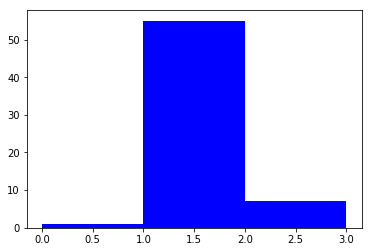

In [90]:
plt.hist(listOfMutualFrndCnt,color='b',bins=range(min(listOfMutualFrndCnt),max(listOfMutualFrndCnt)+1))
plt.xlabel('Mutual Friends Count')
plt.ylabel('Number of users')
plt.show()


In [88]:
#number of users with no mutual friend to show
print("Total users with No recommendations: "+(str(len(noMutualToShow))))
print("Inference: These users are disjoint graphs i.e. they are cyclic and every user of a graph is friend with all the users present in the same graph.")

#userids with no mutual friend to show

noMutualToShowDf= pd.DataFrame(list(noMutualToShow))
noMutualToShowDf


Total users with No recommendations: 1
Inference: These users are disjoint graphs i.e. they are cyclic and every user of a graph is friend with all the users present in the same graph.


,0
0,610445452
